# **Machine Learning Project**

## Problem statement

**Business Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:
1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


**Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

**Data Dictionary**

- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
- case_status: Flag indicating if the Visa was certified or denied


## Import all the necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
visa_data = pd.read_csv("/content/drive/MyDrive/EasyVisa.csv")
data = visa_data.copy()

## Data Overview

In [ ]:
data.head().T

,0,1,2,3,4
case_id,EZYV01,EZYV02,EZYV03,EZYV04,EZYV05
continent,Asia,Asia,Asia,Asia,Africa
education_of_employee,High School,Master's,Bachelor's,Bachelor's,Master's
has_job_experience,N,Y,N,N,Y
requires_job_training,N,N,Y,N,N
no_of_employees,14513,2412,44444,98,1082
yr_of_estab,2007,2002,2008,1897,2005
region_of_employment,West,Northeast,West,West,South
prevailing_wage,592.203,83425.650,122996.860,83434.030,149907.390
unit_of_wage,Hour,Year,Year,Year,Year


### Checking the shape of the dataset

In [ ]:
print('There are',data.shape[0], 'rows and', data.shape[1], 'columns in the dataset')

There are 25480 rows and 12 columns in the dataset


### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Checking for missing values

In [ ]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no missing values in the dataset.

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the dataset.

#### Dropping the columns with all unique values

In [ ]:
data.case_id.nunique()

25480

* The `case_id` column contains only unique values, so we can drop it.

In [ ]:
data = data.drop(["case_id"], axis=1)

### Statistical summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


- From analysis it is observed that no_of_employees, yr_of_estab, and prevailing_wage are numeric features while rest are objects.
- The no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed.
- There are negative values in the no of employees which could be an error.
- Year of establish ranges from 1800 to 2016.
- Prevailing wage ranges from 2 to 319,210 and distribution is skewed.


In [ ]:
data.describe(include = ['object']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- The most popular continent is Asia.
- The most popular educational level is Bachelor's degree.
- The most popular region of employment is Northeast.

## Exploratory Data Analysis

### Univariate Analysis

Different types of Univariate Analysis that can be done:
- Univariate Analysis of  Numerical Variable.
- Univariate Analysis of Categorical Variable.

In [ ]:
data.nunique()

,0
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4
full_time_position,2


**Numerical variables**

- no_of_employees
- yr_of_estab
- prevailing_wage

**Categorical variables**

- continent
- education_of_employee
- has_job_experience
- requires_job_training
- region_of_employment
- unit_of_wage
- full_time_position
- case_status


In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Numerical variable

##### Observation on no of employees

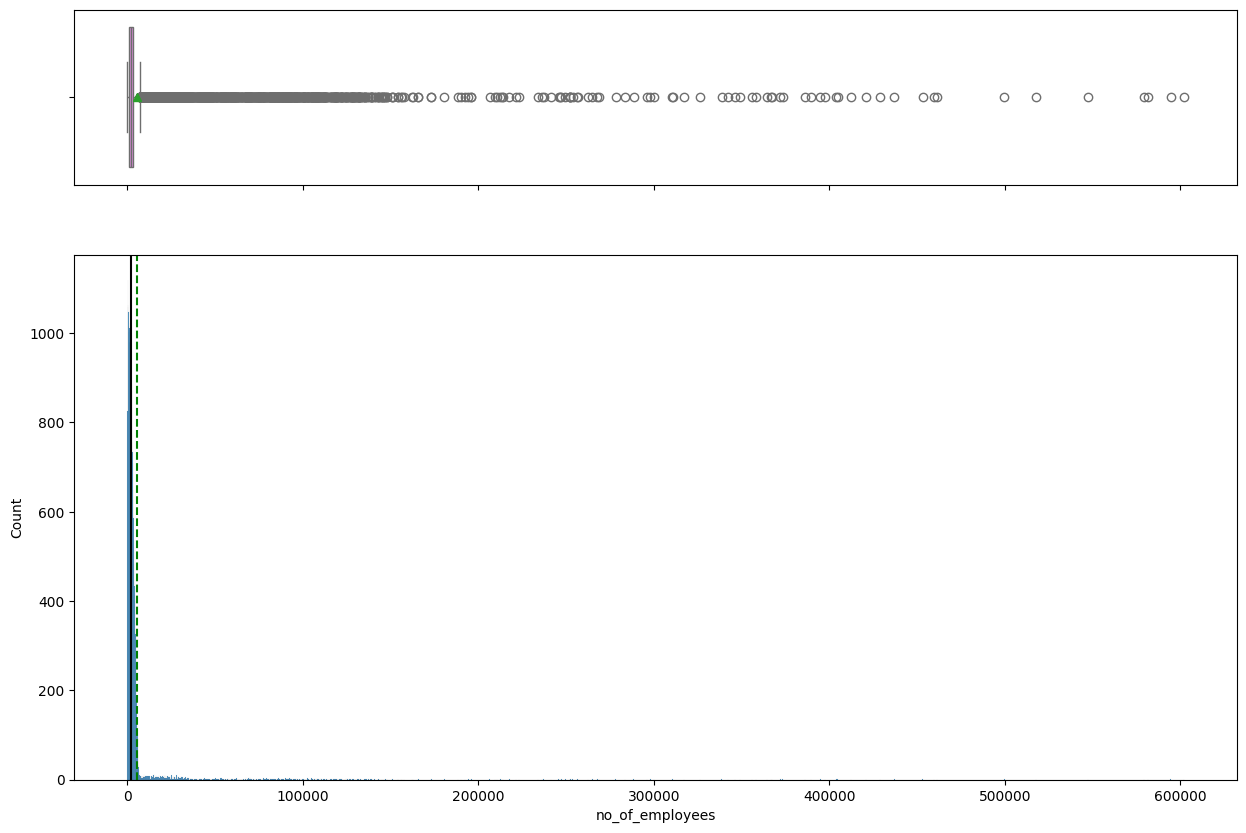

In [ ]:
histogram_boxplot(data, "no_of_employees")

- The distribution of the number of employees is extremly skewed to the right.
- It can be implies that the dataset has small companies, medium companies, and large international companies.

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 11)

In [ ]:
data.loc[data['no_of_employees'] > 0].shape

(25447, 11)

We need to investigate the negative values in the number of employees in feature engineering.

##### Observation on year of establish

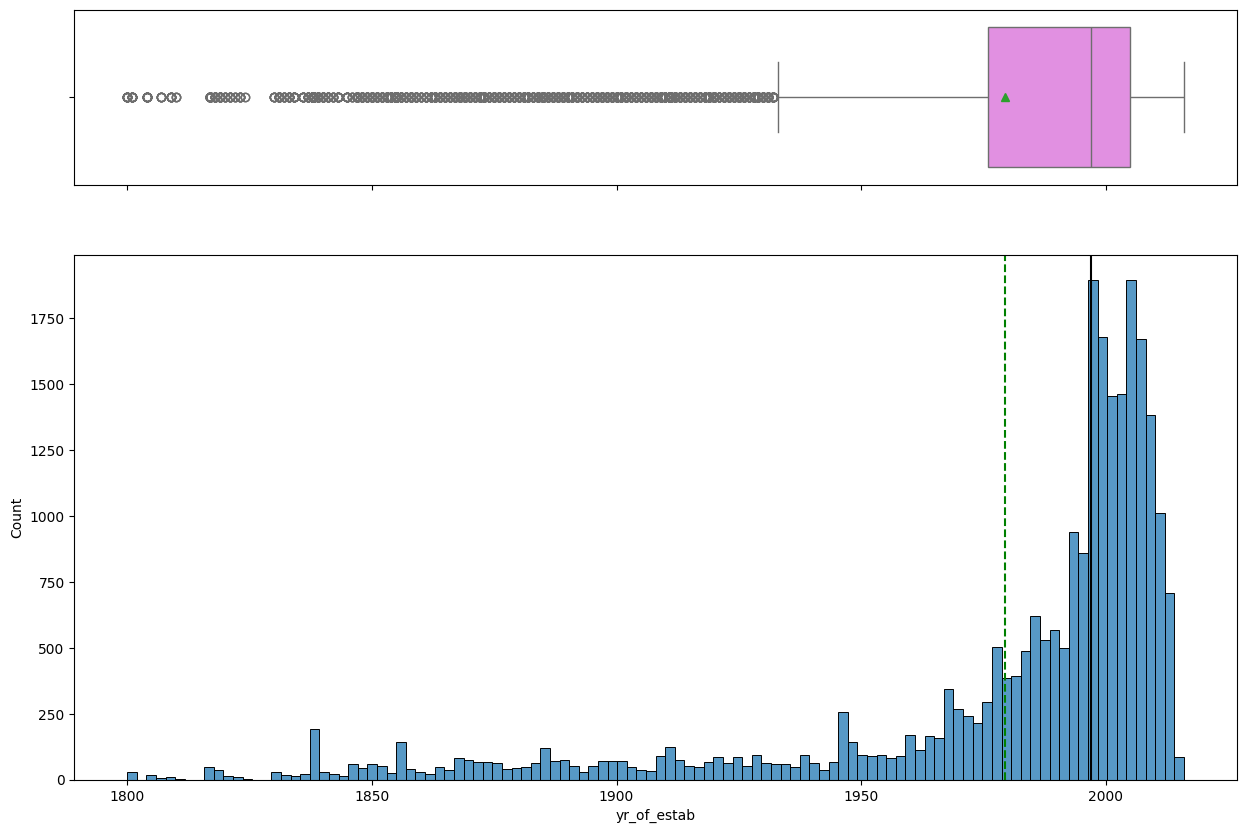

In [ ]:
histogram_boxplot(data, "yr_of_estab")

In [ ]:
data.loc[data['yr_of_estab'] < 1950].shape

(4052, 11)

The data and graphs above, indicate the distribution of companies by year of establishment (i.e., founding) is heavily left skewed, even without any outlier values.

##### Observation on prevailing wage

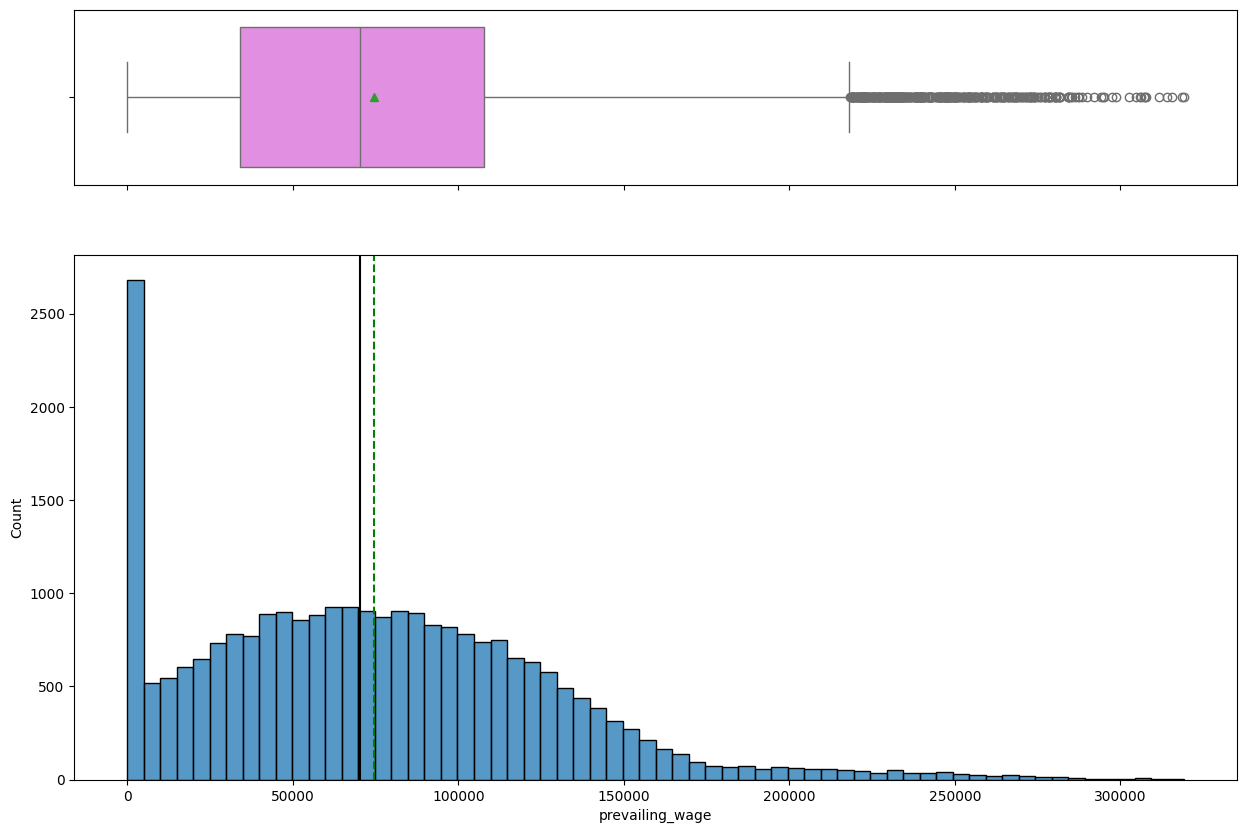

In [ ]:
histogram_boxplot(data, "prevailing_wage")

- The distribution of the prevailing wage is skewed to the right.
- There is a huge difference between wages among applicants.
- There are applicants whose wage is more than 150,000.
- There are applicants whose wage is less than 10.
- Some wages are entered as hourly base while others as yearly base.

In [ ]:
data.loc[data['prevailing_wage'] == 0].shape

(0, 11)

In [ ]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Hour,176


In [ ]:
data.loc[data['prevailing_wage'] > 20000, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,20785
Week,257
Month,81


So the small wages are actually hourly based.

#### Categorical variable

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
--------------------------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
--------------------------------------------------
full_time_posit

##### Observation on continent

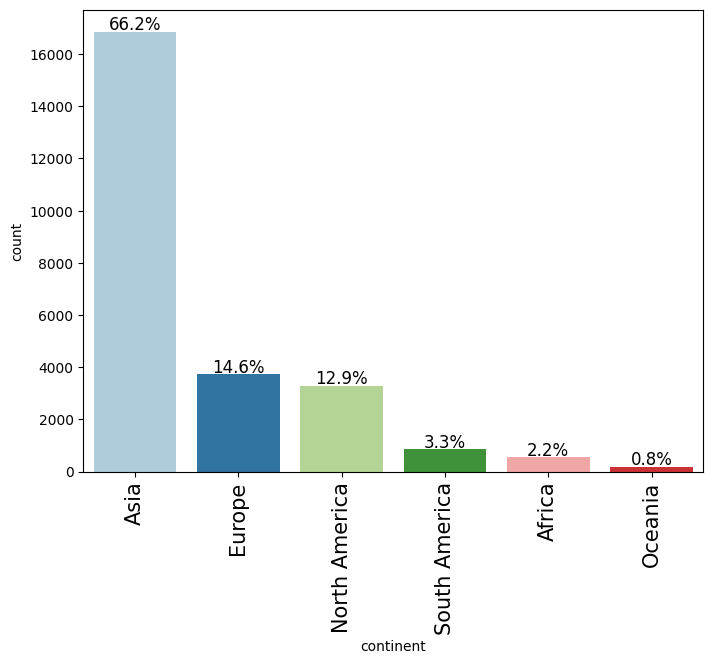

In [ ]:
labeled_barplot(data, "continent")

- Most of employees 16861 (66%) are coming from Asia followed by 3732 (15%) are coming from EU and 3292 (13%) are from North America.
- Least number of employees are coming from
Oceania.

##### Observation on education of employee

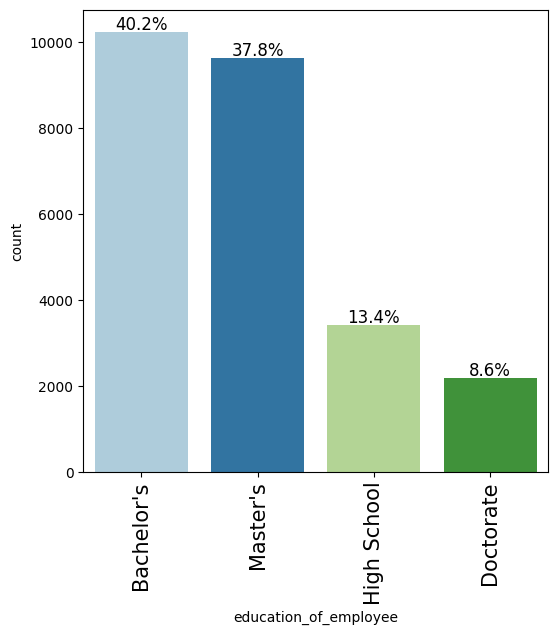

In [ ]:
labeled_barplot(data, "education_of_employee")

- Most of the applicants 10234 (40.2%) have a bachelor's degree, followed by master's degree having 9634 (37.8%).
- Least number of the applicants 2192 (8.6%) have doctorate degree.

##### Observation on has job experience

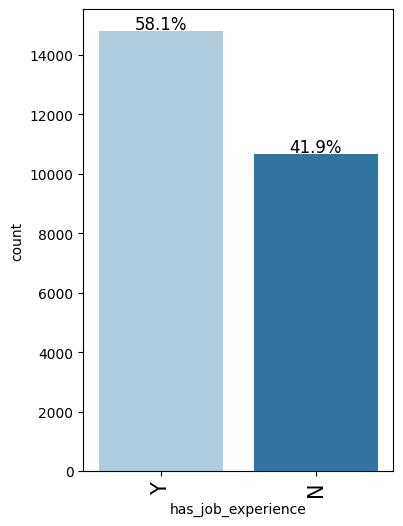

In [ ]:
labeled_barplot(data, "has_job_experience")

58.1% of the applicants (14802) have job experience.

##### Observation on requires job training

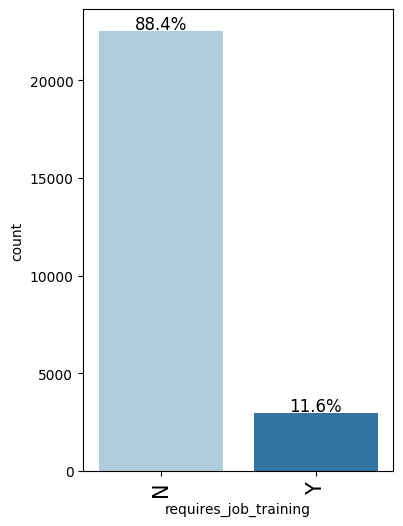

In [ ]:
labeled_barplot(data, "requires_job_training")

88.4% of the applicants (22525) do not require any job training.

##### Observation on region of employment

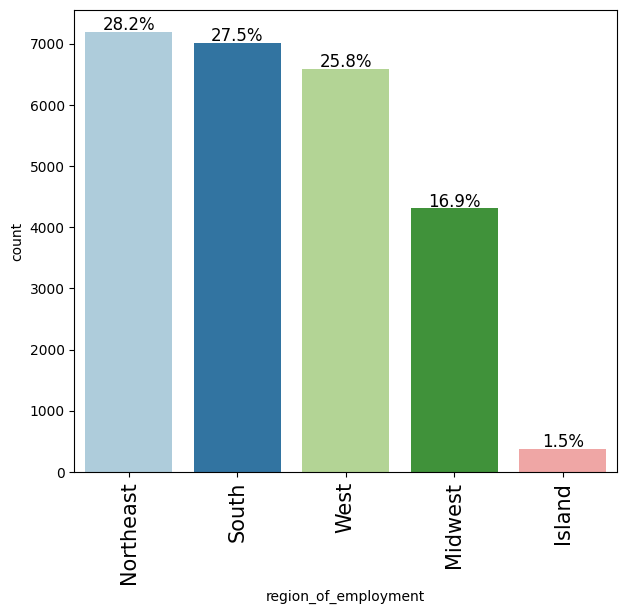

In [ ]:
labeled_barplot(data, "region_of_employment")

- Almost Northeast, South, and West are equally distributed.
- The Island regions have only 1.5% of the applicants (375) which is the least count.

##### Observation on unit of wage

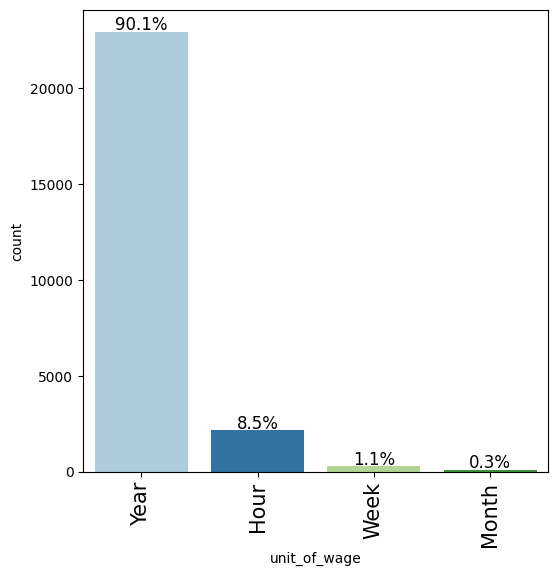

In [ ]:
labeled_barplot(data, "unit_of_wage")

- 90.1% of the applicants (22962) have a yearly unit of the wage
- 8.5% of the applicants (2157) have a yearly unit of the wage
- Least number of the applicants (89) have monthly unit of the wage.

##### Observation on full time position

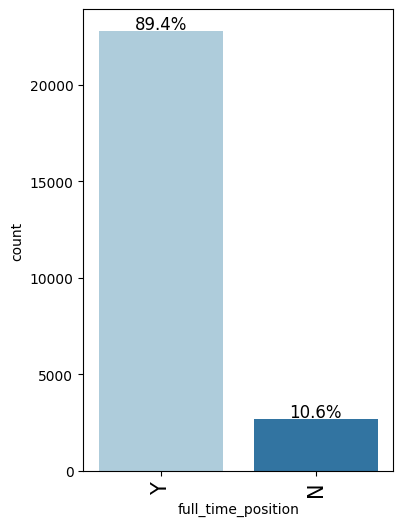

In [ ]:
labeled_barplot(data, "full_time_position")

Most of the applicants have full time position.

##### Observation on case status

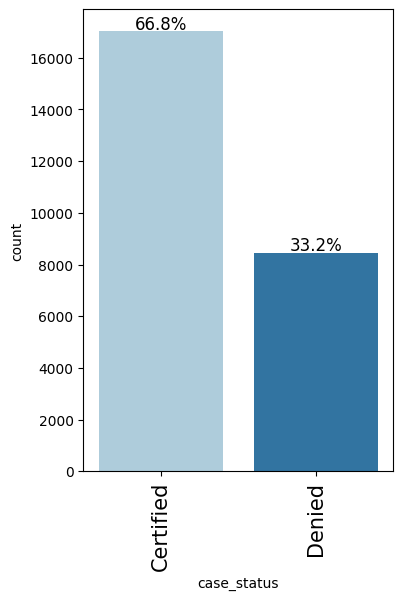

In [ ]:
labeled_barplot(data, "case_status")

Most of the visas were certified

### Bivariate Analysis

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables.
- Bivariate Analysis of two Categorical Variables.
- Bivariate Analysis of one Numerical Variable and one Categorical Variable.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation by Heatmap

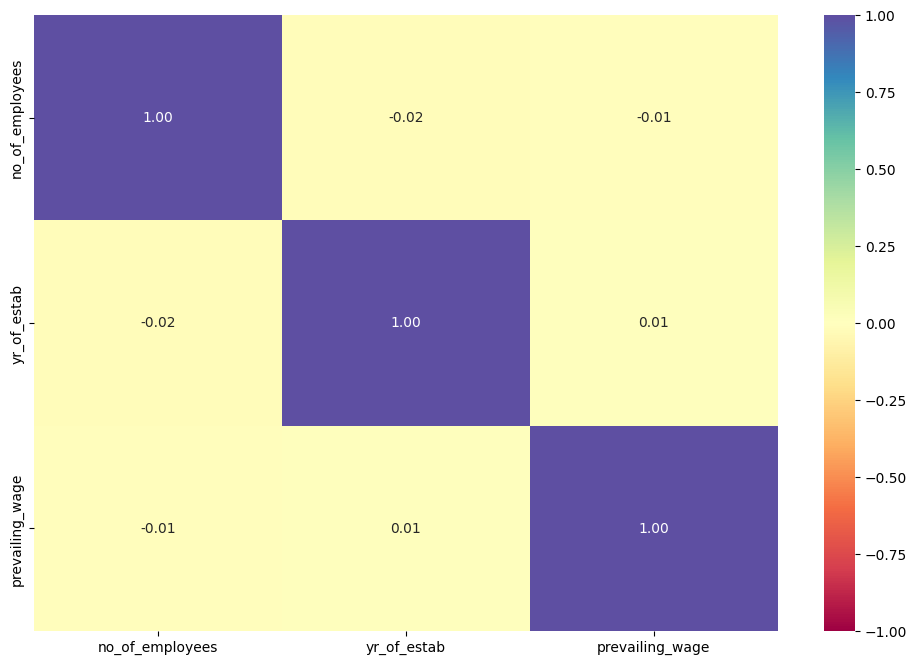

In [ ]:
# Check for correlation among numerical variables
num_var = data.select_dtypes(include=np.number).columns.tolist()

corr = data[num_var].corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

No numerical variables are correlated with each other.

#### Pairplot of numerical variables

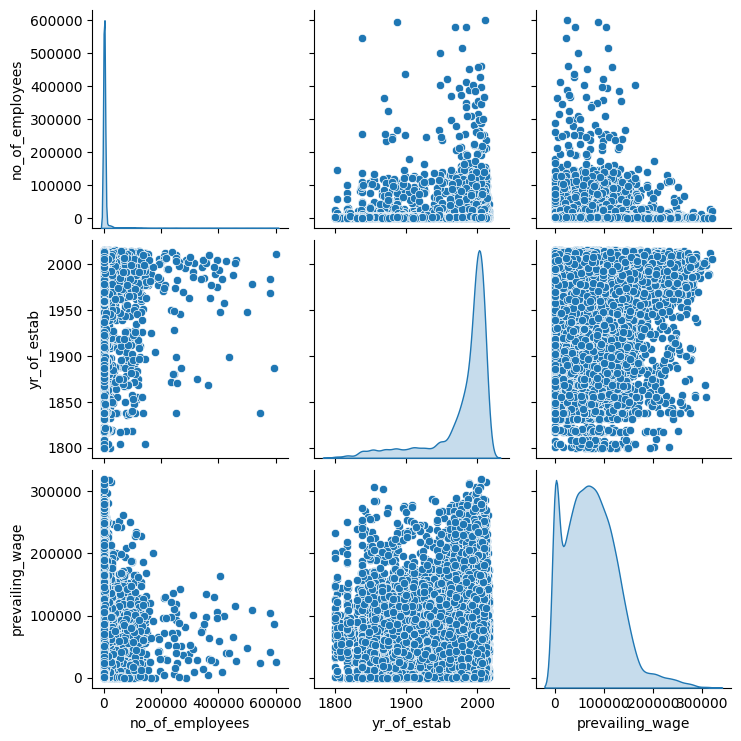

In [ ]:
sns.pairplot(data=data[num_var], diag_kind="kde")
plt.show()

#### Observation on education Vs region of employment

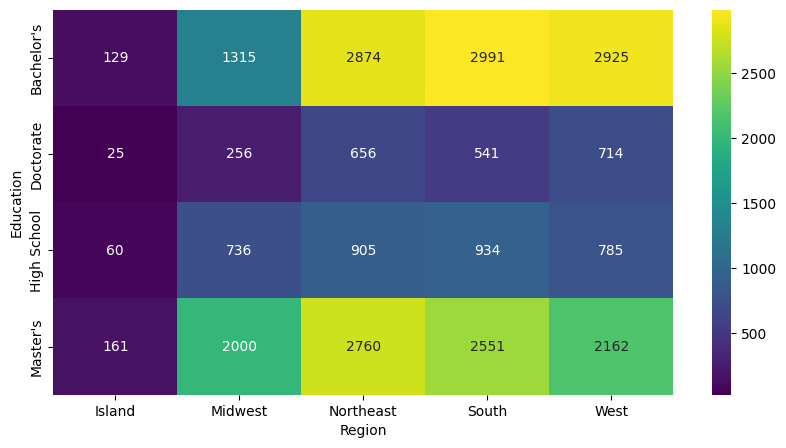

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

- The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
- The requirement for Bachelor's is mostly in South region, followed by West region.
- The requirement for Master's is most in Northeast region, followed by South region.
- The requirement for Doctorate's is mostly in West region, followed by Northeast region.

#### Observation on case status Vs region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


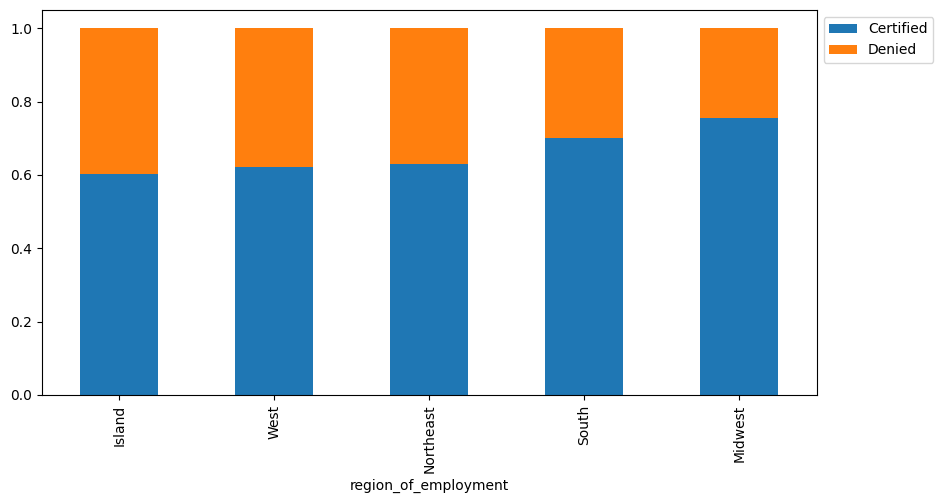

In [ ]:
stacked_barplot(data,'region_of_employment','case_status')

- Midwest has the highest positive case chance.
- Island, in the opposite side, has the lowest positive case chance.

#### Observation on case status Vs education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


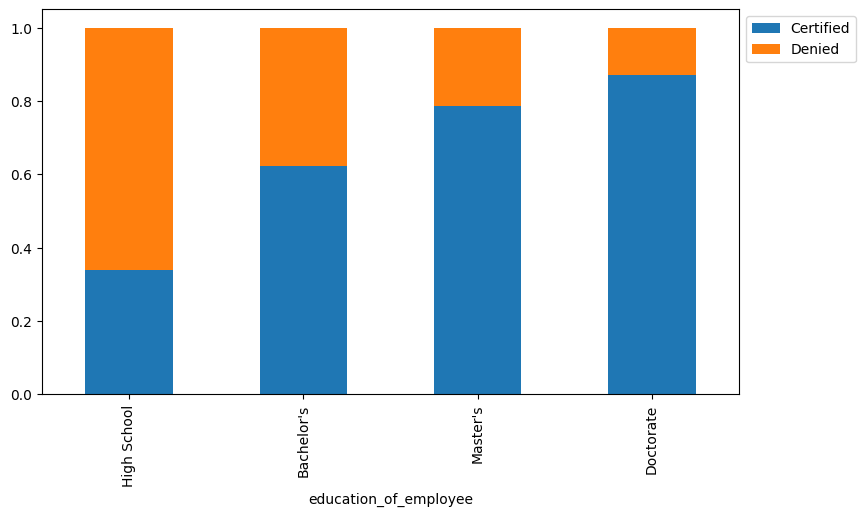

In [ ]:
stacked_barplot(data,'education_of_employee','case_status')

- As the graph aboves shows, the ratio of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases.
- The ratio of an applicant with a high school diploma being approved versus denied is approximately 1:2.
- The ratio for an applicant with a doctorate is approximately 7:1.
- Those with higher education may want to travel abroad for a well-paid job.

#### Observation on case status Vs continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


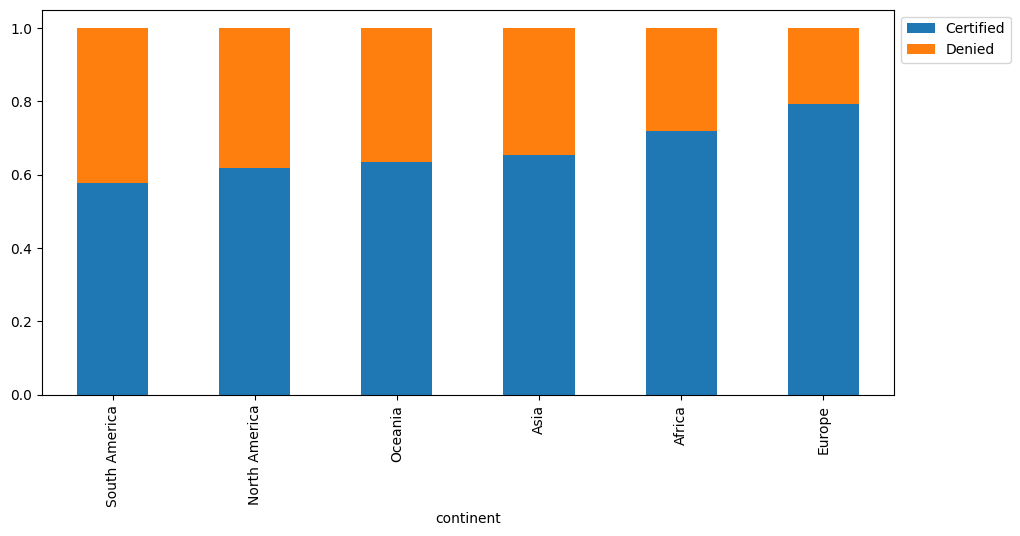

In [ ]:
stacked_barplot(data,'continent','case_status')

- Applicants from Asia comprise almost two-third of all applications and these applicants have almost a 2:1 ratio of approvals to denials.
- An application from a European applicant has the best ratio of approvals to denials is approximately (4:1).

#### Observation on case status Vs has job experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


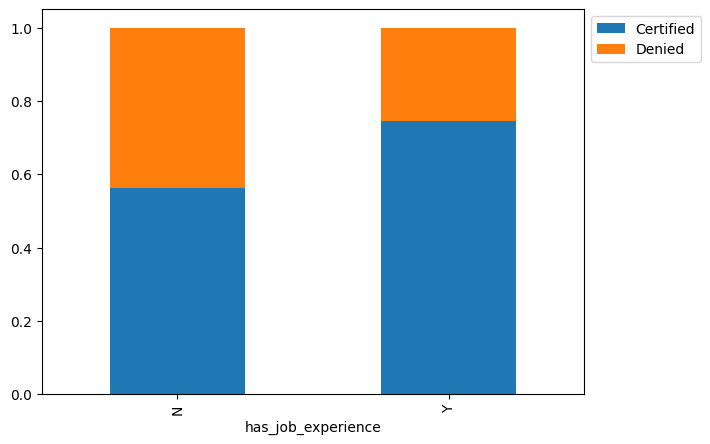

In [ ]:
stacked_barplot(data,'has_job_experience','case_status')

- Applicants with job experience have a ratio of approved to denied applications of approximatelyimately 3:1, whereas the same ratio for applicants without job experience have around a 5:4 ratio (i.e., approximatelyimately equivalent).
- Experienced professionals might look abroad for opportunities to improve their lifestyles and career development.

#### Observation on case status Vs unit of wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


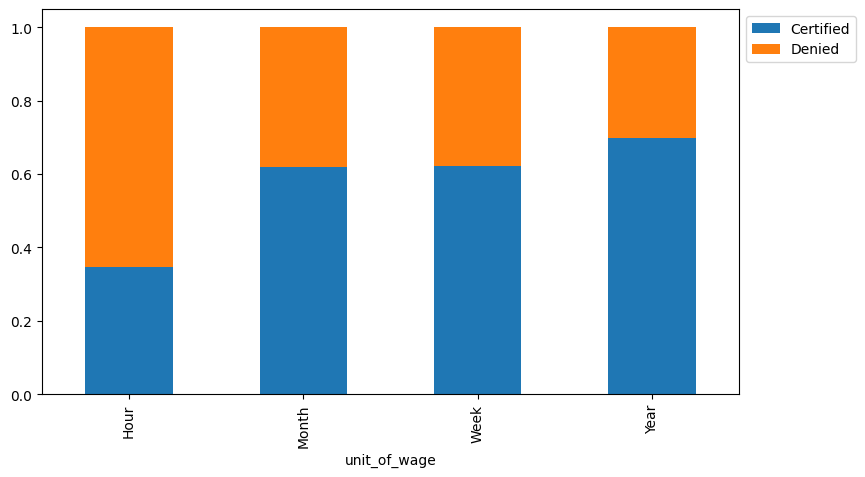

In [ ]:
stacked_barplot(data,'unit_of_wage','case_status')

- Applicants who are applying to work in a job with an hourly rate have a ratio of approved versus denied applications of approximately 1:2. Additionally, these applicants comprise only approximately 8% of all applications, but comprise approximately 17% of all denials.
- Applicants from any other unit_of_wage category have a ratio of approximately 2:1, with applications for jobs with annual salaries showing nearly a 2.5:1 ratio of approvals to denials.

#### Observation on case status Vs prevailing wage

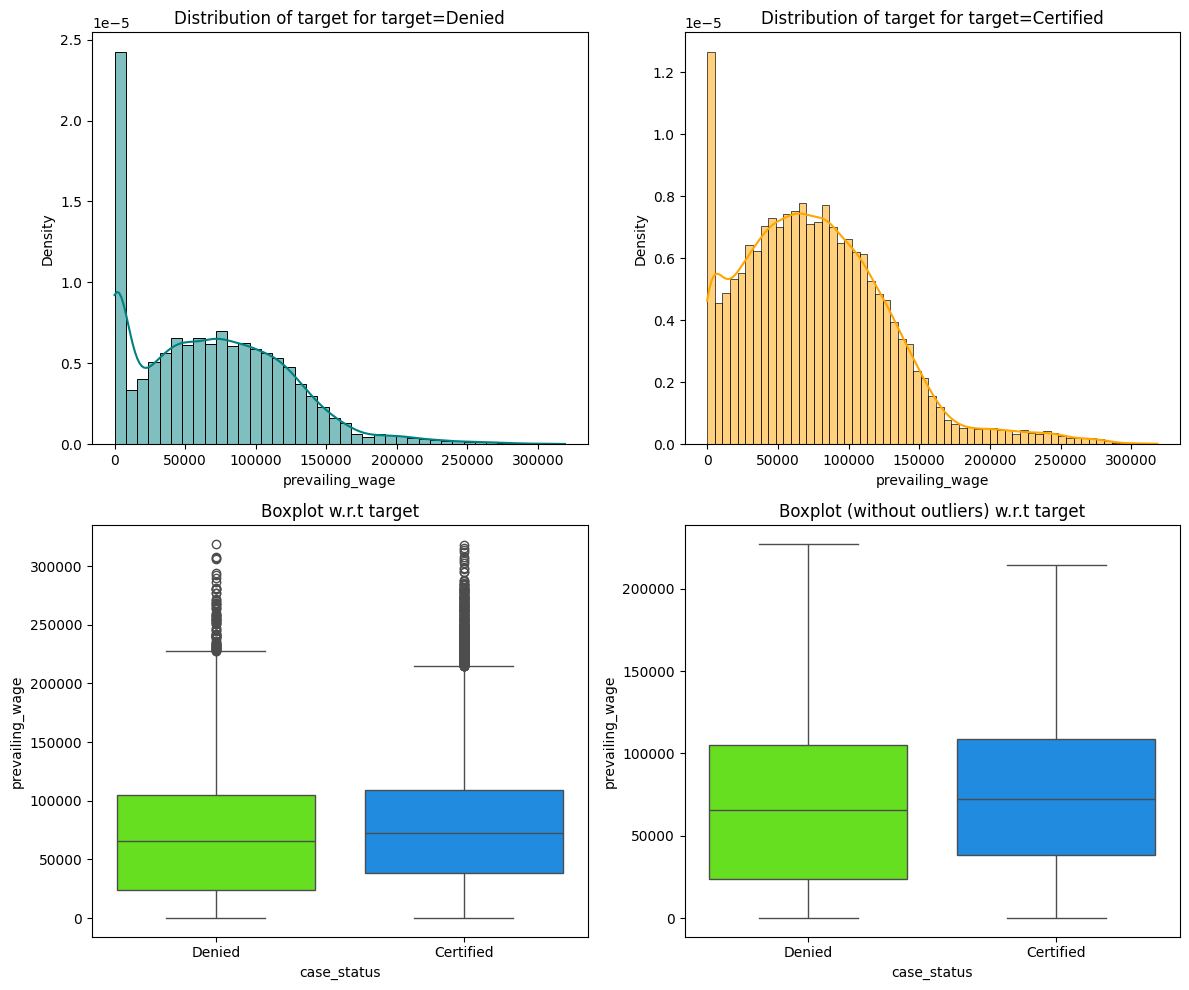

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status');

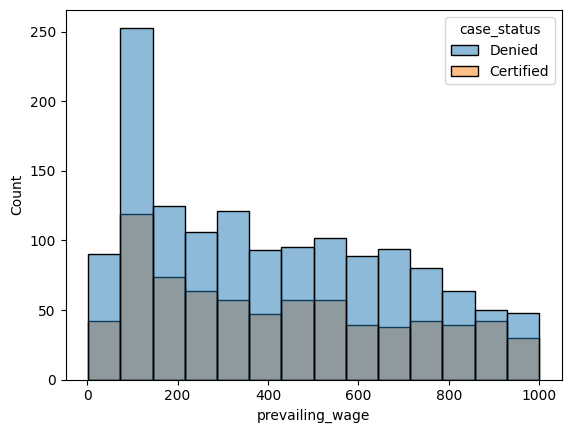

In [ ]:
#create a dataframe only of workers applying for jobs with a *unit_wage* of 'Hour'
data_hourly = data[data.unit_of_wage=='Hour']
#show a distribution of the *prevailing_wage* within this dataframe, along with the ratio of *case_status* within each bin
sns.histplot(data=data_hourly, x='prevailing_wage', hue='case_status')
plt.show()

In [ ]:
#create bins that categorize applicants by the per-day wage of the job he or she is applying for
bins = list(np.arange(0,1100,200))
#assign each applicant to a category
data_hourly['income_per_day'] = pd.cut(data_hourly['prevailing_wage'], bins)
data_hourly.groupby('income_per_day')['case_status'].value_counts()

income_per_day  case_status
(0, 200]        Denied         448
                Certified      219
(200, 400]      Denied         301
                Certified      166
(400, 600]      Denied         274
                Certified      144
(600, 800]      Denied         239
                Certified      116
(800, 1000]     Denied         148
                Certified      102
Name: count, dtype: int64

<Axes: xlabel='income_per_day', ylabel='count'>

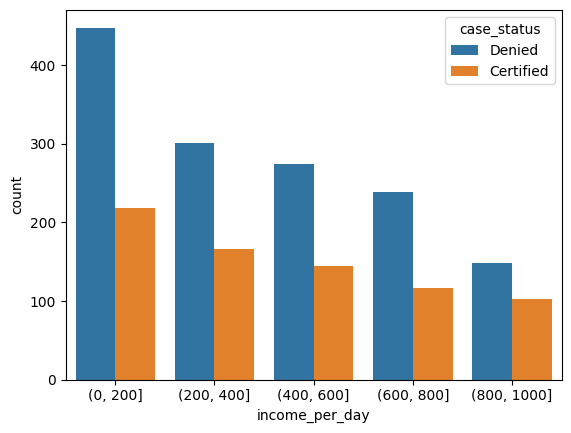

In [ ]:
sns.countplot(x='income_per_day',hue='case_status', data=data_hourly)

- As the graph above show, even within applicants for jobs with an 'Hour' prevailing_wage, the ratio of approved to denied applications increases considerably as prevailing_wage increases.
- Even at the highest income_per_day category, an application is still more likely to be denied than approved.

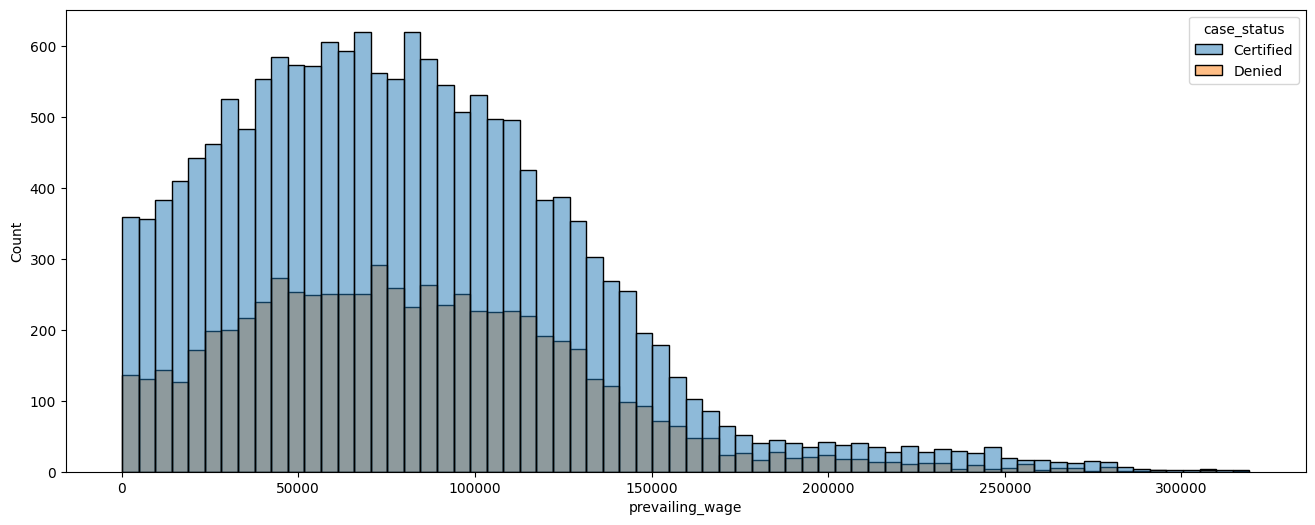

In [ ]:
#create a new dataframe of only those applicants applying for jobs with annual salaries (i.e., not 'Hour')
data_annual = data[data.unit_of_wage != "Hour"]
#show the distribution of annual salaries, along with ratio of *case_status* within each bin
plt.figure(figsize=(16,6))
sns.histplot(data=data_annual, x='prevailing_wage', hue='case_status')
plt.show()

- The distribution of wages is (as expected) right skewed, indicating a long-tail of jobs with annual salaries above 150,000 dollars.
- As the distribution above shows, the ratio of approved to denied applications remains approximately  equivalent across the range of wages.

In [ ]:
#create bins to categorize a job by its annual salary, which indicates how well paying the job is
bins = [0,25000,50000,75000,100000,125000,np.inf]
names = ['$0-25k','$25k-50k','$50k-75k','$75k-100k','$100k-125k','$125k+']
#assign an applicant to a category
data_annual['income_per_year'] = pd.cut(data_annual['prevailing_wage'], bins, labels=names)
data_annual.groupby('income_per_year')['case_status'].value_counts()

income_per_year  case_status
$0-25k           Certified      2090
                 Denied          761
$25k-50k         Certified      2839
                 Denied         1237
$50k-75k         Certified      3133
                 Denied         1372
$75k-100k        Certified      3014
                 Denied         1318
$100k-125k       Certified      2410
                 Denied         1138
$125k+           Certified      2785
                 Denied         1226
Name: count, dtype: int64

<Axes: xlabel='income_per_year', ylabel='count'>

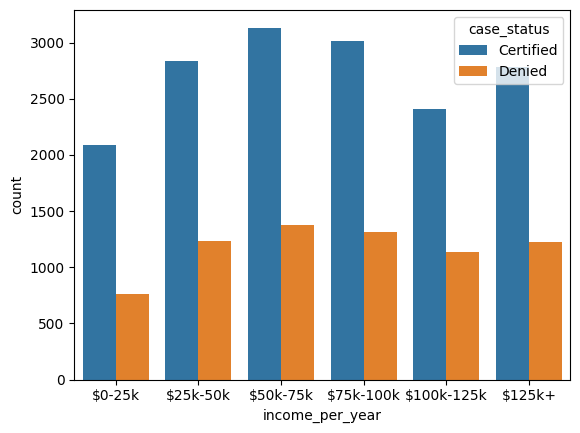

In [ ]:
sns.countplot(x='income_per_year',hue='case_status', data=data_annual)

- In support of the observation above, there does not appear to be a significant change in ratio of approved to denied applications as income_per_year increases. To the contrary, the ratio may actually decrease as this prevailing_wage increases.
- For applications for jobs with an income_per_year wage, the highest concentration of applications is for jobs with 50,000 to 75,000 dollars per year in salary.

#### Observation on case status Vs no of employees

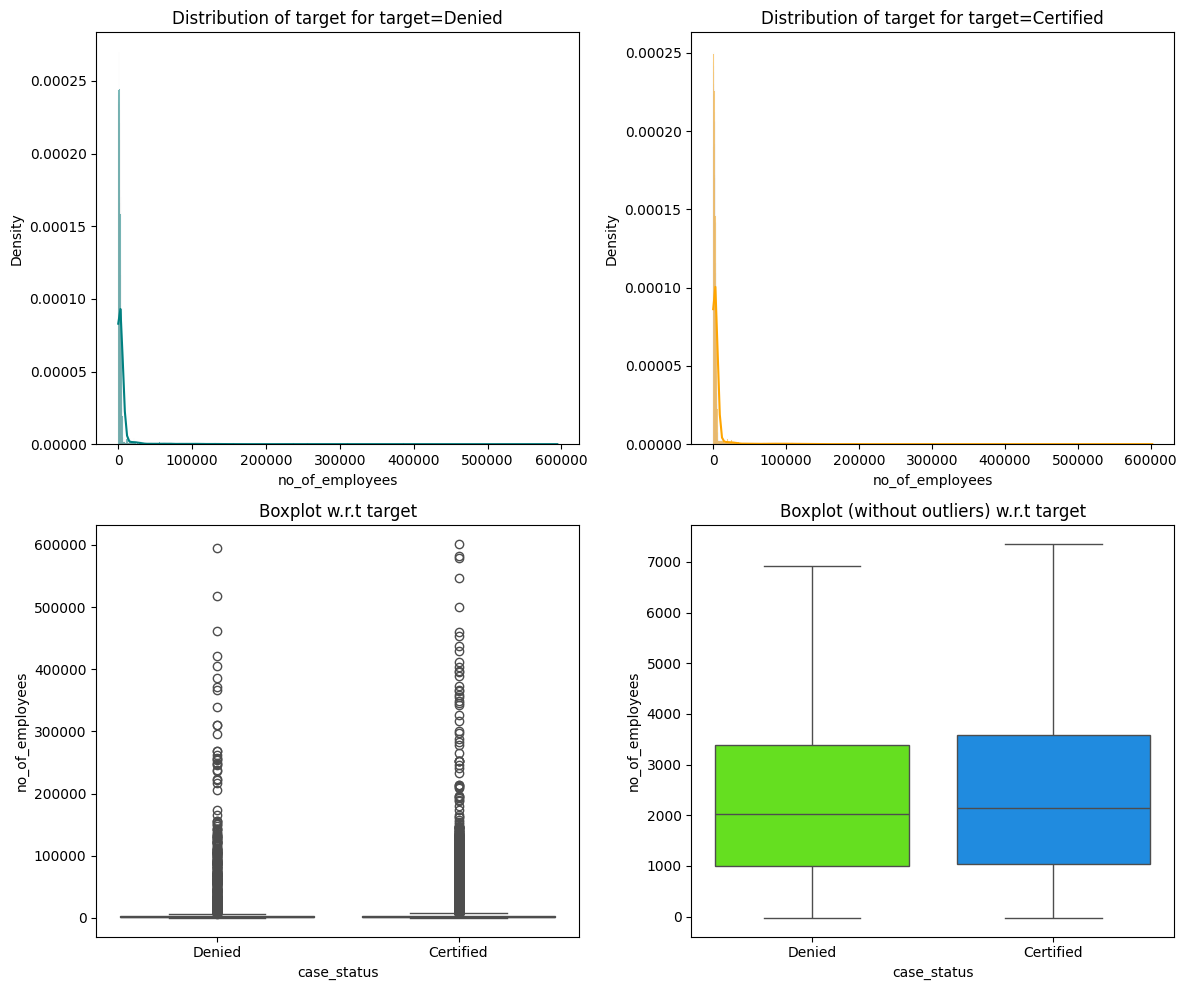

In [ ]:
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status');

In [ ]:
#create bins to categorize companies by the size of their overall workforce
data_size = data.copy()
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
#assign each applicant to a category which indicates the size of the company he or she is applying to
data_size['company_size'] = pd.cut(data['no_of_employees'], bins, labels=names)
data_size.company_size.value_counts()

,count
company_size,
0-1000,6208
1000-2000,5915
2000-3000,4978
4000+,4798
3000-4000,3548


<Axes: xlabel='company_size', ylabel='count'>

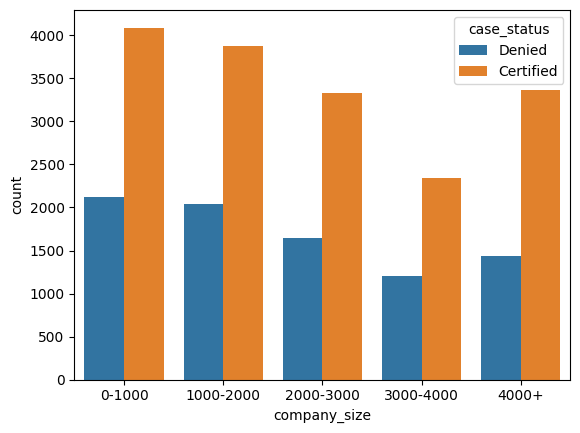

In [ ]:
sns.countplot(x='company_size',hue='case_status', data=data_size)

#### Observation on case status Vs year of establish

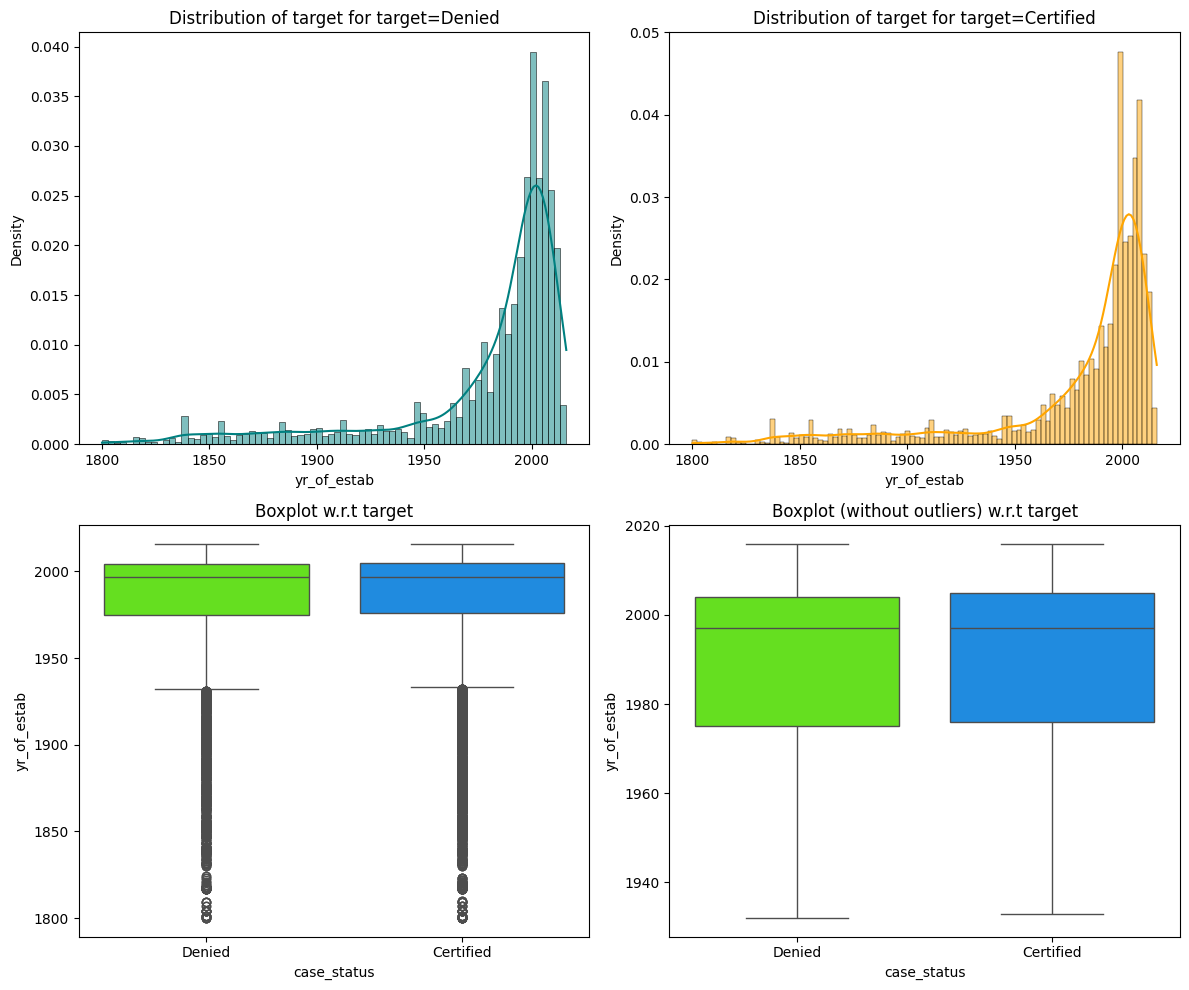

In [ ]:
distribution_plot_wrt_target(data, 'yr_of_estab', 'case_status');

In [ ]:
#create bins to categorize companies by the number of years since the company was founded
bins = [0,1966,1986,1996,2006,np.Inf]
names = ['50+','30-50','20-30','10-20','0-10']
#assign each applicant to a category which indicates how long the company has been in business (i.e., a proxy for how well-established the company is)
data_size['company_age'] = pd.cut(data['yr_of_estab'], bins, labels=names)
data_size.company_age.value_counts()

,count
company_age,
10-20,8378
50+,5109
0-10,4856
30-50,3746
20-30,3391


<Axes: xlabel='company_age', ylabel='count'>

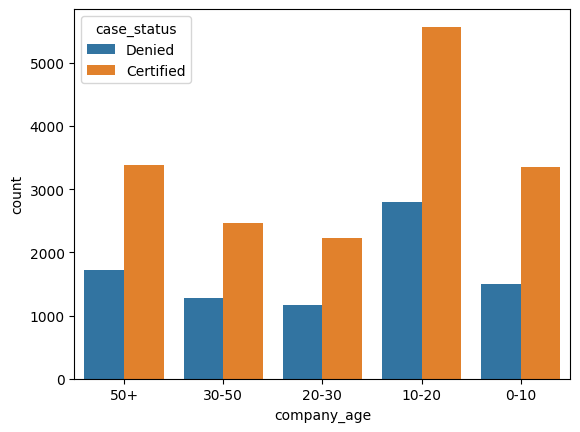

In [ ]:
sns.countplot(x='company_age',hue='case_status', data=data_size)

### Multivariate Analysis

#### Observation on case status Vs education Vs region of employment

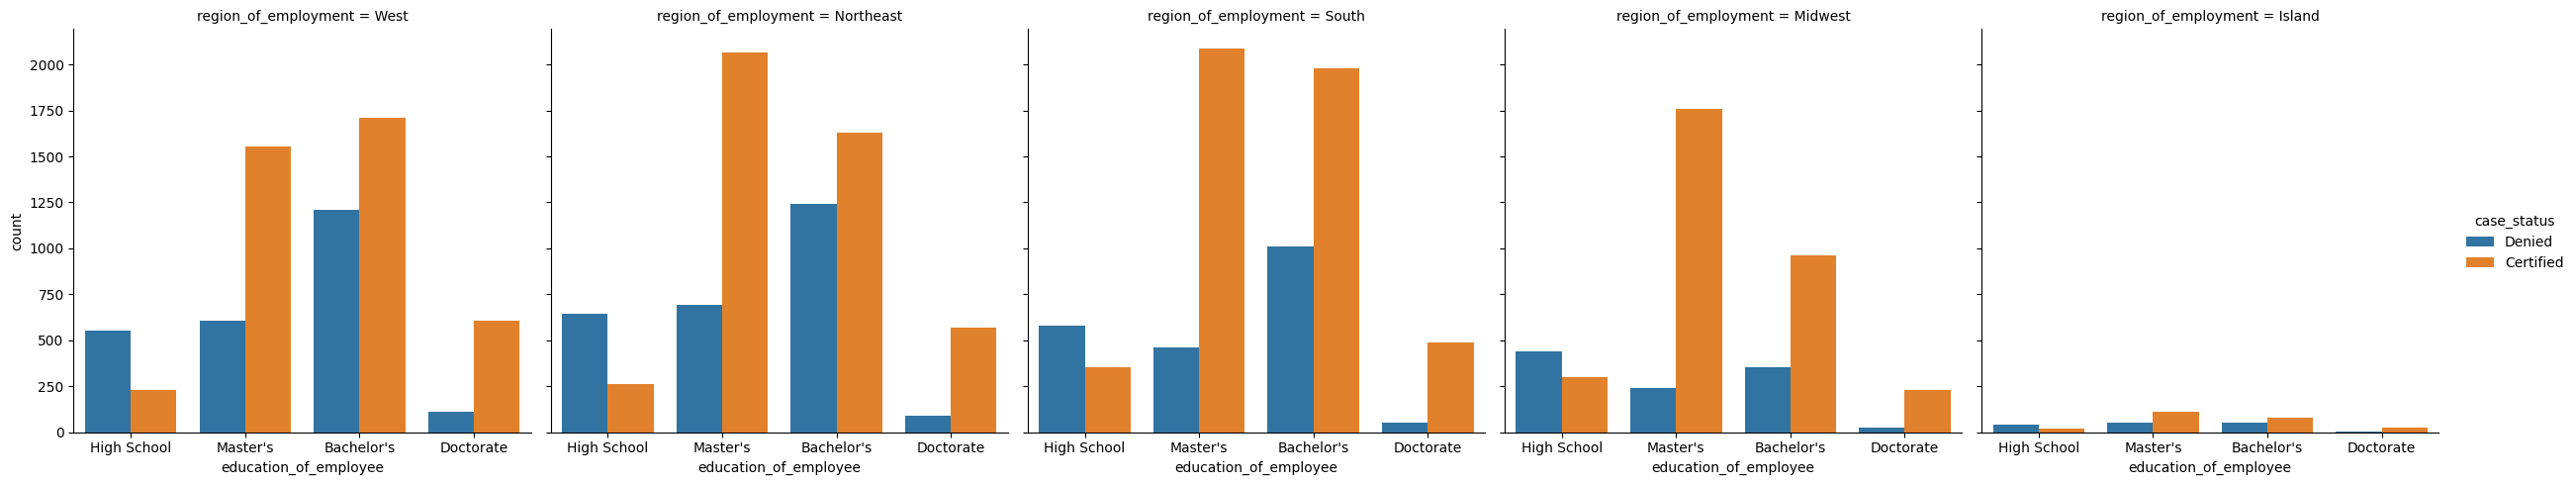

In [ ]:
sns.catplot(data=data,x='education_of_employee',col='region_of_employment',hue ='case_status',kind = 'count')

### Insight from EDA

- An applicant applying for a job requiring a high school diploma will more than likely be denied. Conversely, applications for jobs requiring a Master's degree or doctorate are very likely to be approved.
- An applicant applying for a job without any previous job experience is more likley to be denied than an applicant for a job with experience.
- The higher the prevailing wage of the job an applicant is applying for, the more likely the application will be approved. This is especially true for applications for jobs with an hourly unit of wage.
- Most applicants are from Asia and applicants from Europe, Africa, and Asia have higher chances of visa certification.
- We observed that applications to work in the Mid-West region have more chances of visa approval.

## Data Preprocessing

### Missing Value Treatment

In [ ]:
data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [ ]:
data.duplicated().sum()

0

### Feature Engineering

In [ ]:
# encode case status, where certified is 1, denied is 0
data['case_status'] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
data.loc[data['no_of_employees'] == 0].shape

(0, 11)

In [ ]:
data.loc[data['no_of_employees'] > 0].shape

(25447, 11)

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 11)

- Since the number of employees in a company cannot be negative, we consider them as data entry errors.
- We have 33 cases like this. So we can take the absolute value of those values.
- We do this in data preprocessing step.

In [ ]:
# convert the negative values to their absolute values
data['no_of_employees'] = abs(data['no_of_employees'])

In [ ]:
data.loc[data['no_of_employees'] > 0].shape

(25480, 11)

### Outlier detection and treatment

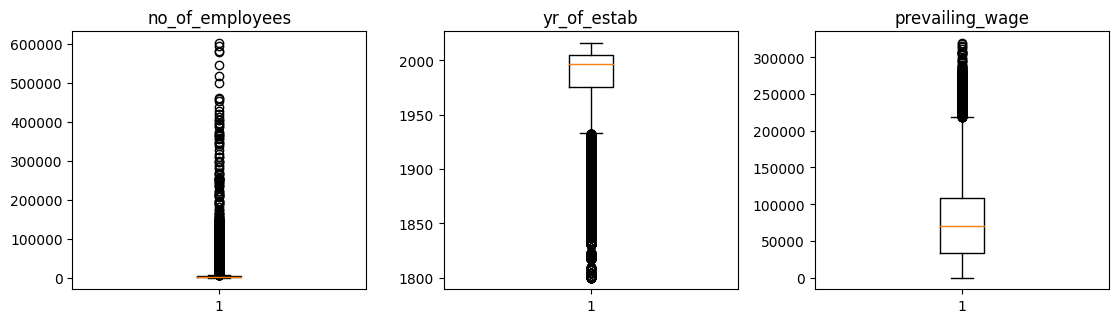

In [ ]:
# outlier detection using boxplot
numeric_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All numerical columns have outliers
- However, we will not treat them as they are proper values.

### Data Preparation for Modelling

In [ ]:
data['case_status'].value_counts()

,count
case_status,
1,17018
0,8462


In [ ]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


## Building models

### Model evaluation criterion

**Model can make wrong predictions as:**
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**
- Both the cases are important.
- If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.
- If a visa is denied when it had to be certified the US will lose a suitable human resource that can contribute to the economy.

**How to reduce this loss?**
- F1 Score can be the used metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
- We will use balanced class weights so that model focuses equally on both classes.

**Let's define a function to output different metrics on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9896098804156048
Random forest: 1.0
GBM: 0.8291218182658104
Adaboost: 0.81941431670282
dtree: 1.0

Validation Performance:

Bagging: 0.7775995333236108
Random forest: 0.8049978941457252
GBM: 0.8266370082024189
Adaboost: 0.8166485310119695
dtree: 0.7486033519553074


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9896, Validation Score: 0.7776, Difference: 0.2120
Random forest: Training Score: 1.0000, Validation Score: 0.8050, Difference: 0.1950
GBM: Training Score: 0.8291, Validation Score: 0.8266, Difference: 0.0025
Adaboost: Training Score: 0.8194, Validation Score: 0.8166, Difference: 0.0028
dtree: Training Score: 1.0000, Validation Score: 0.7486, Difference: 0.2514


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Random forest and decision tree models have best result 100% f1 score in training data but their values get reduced in validation set as 80% and 75% respectively. Their difference is 20% and 25% which is not good.
-	Gradient boosting and Ada boosting have 83% and 82% f1 score in training and validation data. F1 score difference between these two data sets were 0.2% which is the best results.
-	Gradient boosting model has the best performance followed by AdaBoost model as per the validation performance in original data.


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875473741201949
Random forest: 0.9999510260051911
GBM: 0.8072434234901814
Adaboost: 0.7980933870146699
dtree: 1.0

Validation Performance:

Bagging: 0.7665171898355755
Random forest: 0.7965442764578834
GBM: 0.8173049645390071
Adaboost: 0.8117746957260119
dtree: 0.7320006012325267


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9875, Validation Score: 0.7665, Difference: 0.2210
Random forest: Training Score: 1.0000, Validation Score: 0.7965, Difference: 0.2034
GBM: Training Score: 0.8072, Validation Score: 0.8173, Difference: -0.0101
Adaboost: Training Score: 0.7981, Validation Score: 0.8118, Difference: -0.0137
dtree: Training Score: 1.0000, Validation Score: 0.7320, Difference: 0.2680


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Random forest and decision tree models have best result 100% f1 score in training data but their values get reduced in validation set as 80% and 74% respectively. Their difference is 20% and 26% which is not good.
-	Gradient boosting and Ada boosting have 81% and 80% f1 score in training and value retained in validation data. F1 score difference between these two data sets were almost 1% which is the best results.
-	Gradient boosting model has the best performance followed by AdaBoost model as per the validation performance in over sampled data.


### Model Building - Undersampled Data

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166916
Random forest: 1.0
GBM: 0.7281441717791411
Adaboost: 0.7051306873184899
dtree: 1.0

Validation Performance:

Bagging: 0.7057046979865772
Random forest: 0.7417218543046358
GBM: 0.776595744680851
Adaboost: 0.7619499841722063
dtree: 0.6955818093542644


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9804, Validation Score: 0.7057, Difference: 0.2747
Random forest: Training Score: 1.0000, Validation Score: 0.7417, Difference: 0.2583
GBM: Training Score: 0.7281, Validation Score: 0.7766, Difference: -0.0485
Adaboost: Training Score: 0.7051, Validation Score: 0.7619, Difference: -0.0568
dtree: Training Score: 1.0000, Validation Score: 0.6956, Difference: 0.3044


-	From the above results it is observed that the difference shown is difference between f1 score in training set and validation data set.
-	Random forest and decision tree models have best result 100% f1 score in training data but their values get reduced in validation set as 74% and 70% respectively. Their difference is 26% and 30% which is not good.
-	Gradient boosting and Ada boosting have 73% and 70% f1 score in training but value increased as 78% and 77% in validation data. F1 score difference between these two data sets were 5% which is the best results.
-	Gradient boosting model has the best performance followed by AdaBoost model as per the validation performance in over sampled data.


## Model Performance Improvement

### Models for tuning

- After building 15 models, it was observed that both the GBM and Adaboost models trained on an undersampled and oversampled dataset exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 4 models using the same data (undersampled or oversampled) as we trained them before.

### Hyperparameter Tuning

#### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7177639337500568:
CPU times: user 2.4 s, sys: 358 ms, total: 2.76 s
Wall time: 1min 11s


In [ ]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [ ]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
print("Tuned Ada boost model on under sampled data \n")
adb1_train

Tuned Ada boost model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.709,0.770,0.686,0.725


Tuned Ada boost model on under sampled data 



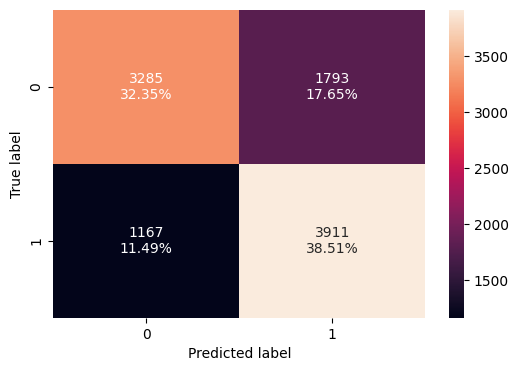

In [ ]:
print("Tuned Ada boost model on under sampled data \n")
confusion_matrix_sklearn(tuned_adb1, X_train_un, y_train_un)

In [ ]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
print("Tuned Ada boost model on under sampled data \n")
adb1_val

Tuned Ada boost model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.727,0.759,0.819,0.788


Tuned Ada boost model on under sampled data 



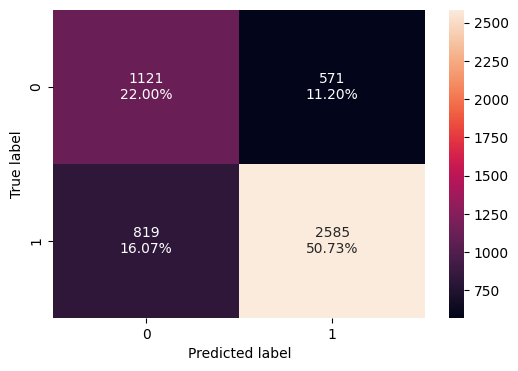

In [ ]:
print("Tuned Ada boost model on under sampled data \n")
confusion_matrix_sklearn(tuned_adb1, X_val, y_val)

Tuned Ada Boost Classifier model with undersampled data has F1 score 0.725 in training data and 0.788 in validation data.

#### Tuning  Gradient Boosting model with Undersampled Data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7200982945401911:
CPU times: user 5.77 s, sys: 740 ms, total: 6.51 s
Wall time: 5min 17s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=150,
                           random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un)
print("Tuned Gradient boosting model on under sampled data \n")
gbm1_train

Tuned Gradient boosting model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.705,0.757,0.686,0.720


Tuned Gradient boosting model on under sampled data 



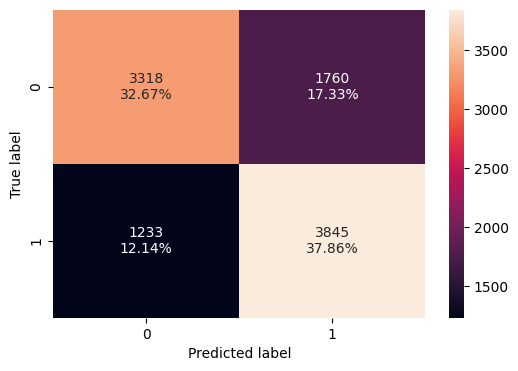

In [ ]:
print("Tuned Gradient boosting model on under sampled data \n")
confusion_matrix_sklearn(tuned_gbm1, X_train_un, y_train_un)

In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print("Tuned Gradient boosting model on under sampled data \n")
gbm1_val

Tuned Gradient boosting model on under sampled data 



,Accuracy,Recall,Precision,F1
0,0.718,0.744,0.818,0.779


Tuned Gradient boosting model on under sampled data 



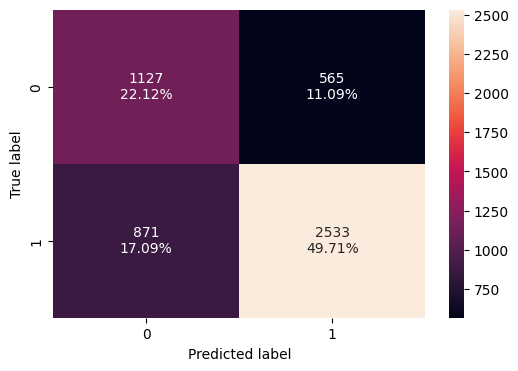

In [ ]:
print("Tuned Gradient boosting model on under sampled data \n")
confusion_matrix_sklearn(tuned_gbm1, X_val, y_val)

Tuned Gradient Boosting model with undersampled data has F1 score 0.720 in training data and 0.779 in validation data.

#### Tuning AdaBoostClassifier model with Oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7974224717855982:
CPU times: user 2.92 s, sys: 426 ms, total: 3.35 s
Wall time: 2min 7s


In [ ]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train_over, y_train_over)
print("Tuned Ada boost model on over sampled data \n")
adb2_train

Tuned Ada boost model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.785,0.855,0.751,0.799


Tuned Ada boost model on over sampled data 



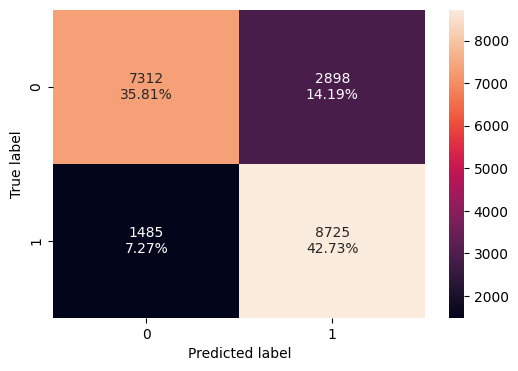

In [ ]:
print("Tuned Ada boost model on over sampled data \n")
confusion_matrix_sklearn(tuned_adb2, X_train_over, y_train_over)

In [ ]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
print("Tuned Ada boost model on over sampled data \n")
adb2_val

Tuned Ada boost model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.743,0.855,0.781,0.816


Tuned Ada boost model on over sampled data 



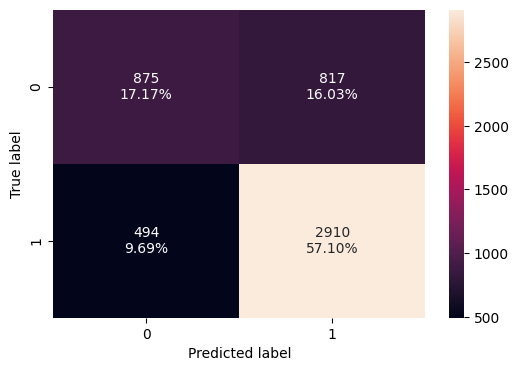

In [ ]:
print("Tuned Ada boost model on over sampled data \n")
confusion_matrix_sklearn(tuned_adb2, X_val, y_val)

Tuned Ada Boost Classifier model with oversampled data has F1 score 0.799 in training data and 0.816 in validation data.

#### Tuning Gradient Boosting model with Oversampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7999576044227753:
CPU times: user 9.82 s, sys: 1.08 s, total: 10.9 s
Wall time: 7min 17s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
print("Tuned Gradient boosting model on over sampled data \n")
gbm2_train

Tuned Gradient boosting model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.803,0.859,0.772,0.813


Tuned Gradient boosting model on over sampled data 



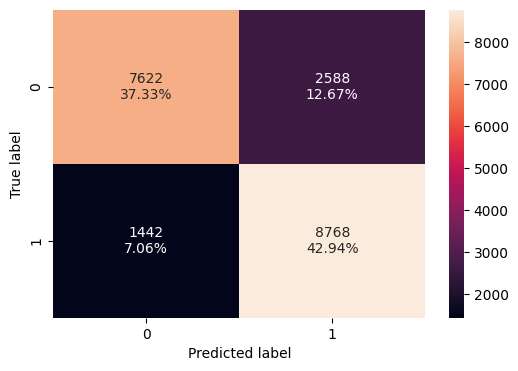

In [ ]:
print("Tuned Gradient boosting model on over sampled data \n")
confusion_matrix_sklearn(tuned_gbm2, X_train_over, y_train_over)

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
print("Tuned Gradient boosting model on over sampled data \n")
gbm2_val

Tuned Gradient boosting model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.747,0.850,0.788,0.818


Tuned Gradient boosting model on over sampled data 



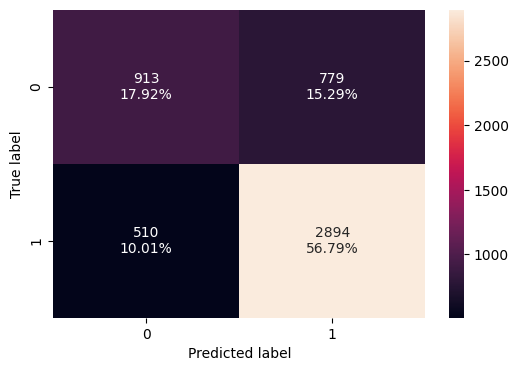

In [ ]:
print("Tuned Gradient boosting model on over sampled data \n")
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

Tuned Gradient Boosting model with oversampled data has F1 score 0.813 in training data and 0.818 in validation data.

## Model Comparison and Final Model Selection

### Comparing performance of tuned models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [adb1_train.T, adb2_train.T, gbm1_train.T, gbm2_train.T], axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data
Accuracy,0.709,0.785,0.705,0.803
Recall,0.770,0.855,0.757,0.859
Precision,0.686,0.751,0.686,0.772
F1,0.725,0.799,0.720,0.813


Gradient boosting model trained with Oversampled data has higher F1 score and having best performnace in training data.

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [adb1_val.T, adb2_val.T, gbm1_val.T, gbm2_val.T], axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data
Accuracy,0.727,0.743,0.718,0.747
Recall,0.759,0.855,0.744,0.850
Precision,0.819,0.781,0.818,0.788
F1,0.788,0.816,0.779,0.818


Gradient boosting model trained with Oversampled data has higher F1 score and having best performnace in validation data.

### Final model performance on test set

Gradient boosting model trained with Oversampled data has generalised performance, so let's consider it as the best model.

In [ ]:
# Let's check the performance on test set
print("Tuned Gradient boosting model on over sampled data \n")
model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)

Tuned Gradient boosting model on over sampled data 



,Accuracy,Recall,Precision,F1
0,0.729,0.840,0.774,0.805


Tuned Gradient boosting model on over sampled data 



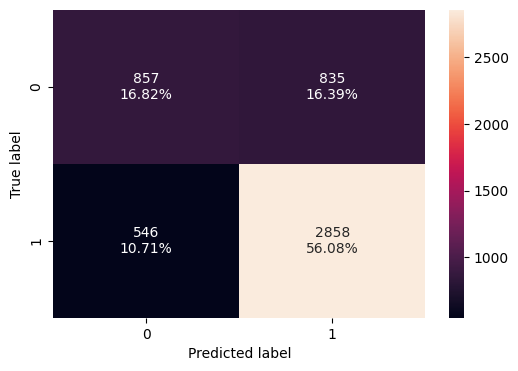

In [ ]:
print("Tuned Gradient boosting model on over sampled data \n")
confusion_matrix_sklearn(tuned_gbm2, X_test, y_test)

### Feature Importance

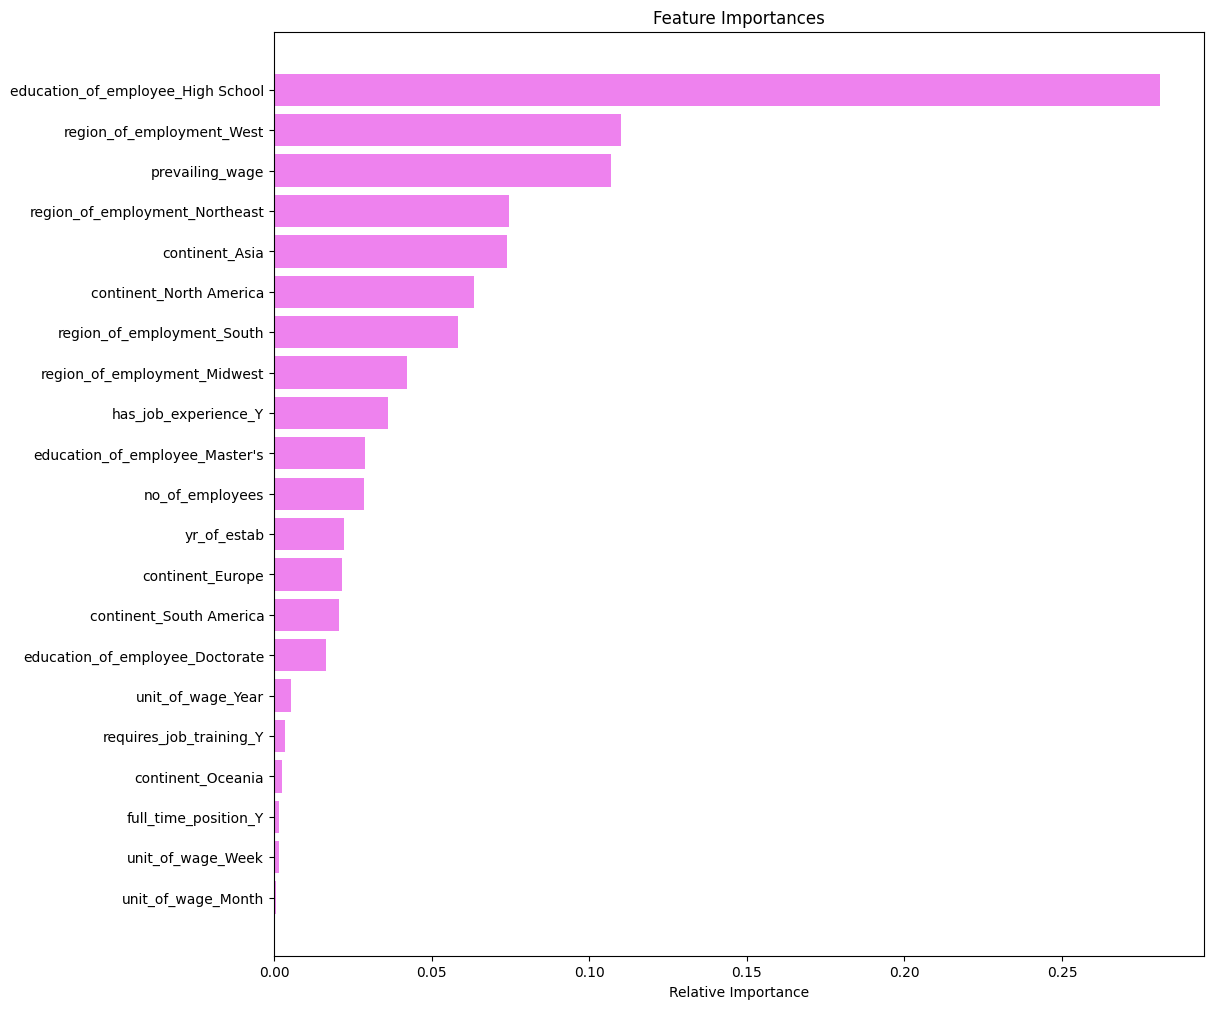

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
"""The importance of features in the tree building
(The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.)"""

print(pd.DataFrame(importances, columns = ["Imp"],
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                    Imp
education_of_employee_High School 0.281
region_of_employment_West         0.110
prevailing_wage                   0.107
region_of_employment_Northeast    0.074
continent_Asia                    0.074
continent_North America           0.063
region_of_employment_South        0.058
region_of_employment_Midwest      0.042
has_job_experience_Y              0.036
education_of_employee_Master's    0.029


- We can see that education_of_employee_High School, region_of_employment_West, prevailing_wage are the most important features for making predictions.
- Attributes like region_of_employment_Northeast, continent_Asia also affecting the model’s prediction.
- Attributes like full_time_position_Y, unit_of_wage_Week and unit_of_wage_Month are least affecting in the model’s prediction.

## Actionable Insights & Recommendations

### Actionable Insights

**The profile of the applicants for whom the visa status can be approved:**

- `Education level` - (Higher education the better) At least has a Bachelor's degree - Master's and doctorate are preferred
- `Job Experience` - Should have some job experience.
- `Prevailing wage` - The median prevailing wage of the employees for whom the visa got certified is around 72k.
- `Continent` - Applicants from Europe, Africa, and Asia have higher chances of visa certification.
- `Region of employment` - Our analysis suggests that the applications to work in the Mid-West region have more chances of visa approval.

The approvals can also be made based on requirement of talent, from our analysis we see that:
- The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
- The requirement for Bachelor's is mostly in South region, followed by West region.
- The requirement for Master's is most in Northeast region, followed by South region.
- The requirement for Doctorate's is mostly in West region, followed by Northeast region.

**The profile of the applicants for whom the visa status can be denied:**

- Education level - Doesn't have any degree and has completed high school.
- Job Experience - Doesn't have any job experience.
- Prevailing wage - The median prevailing wage of the employees for whom the visa got certified is around 65k.
- Unit of Wage - Applicants having an hourly unit of wage.
- Continent - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.
- Additional information of employers and employees can be collected to gain better insights. Information such as:
  - Employers: Information about the wage they are offering to the applicant, Sector in which company operates in, etc.
  - Employee's: Specialization in their educational degree, Number of years of experience, etc.


### Recommendations

To prioritize limited resources towards screening a batch of applications for those most likely to be approved, the OFLC can:
- Sort applications by level of education and review the higher levels of education first.
- Sort applications by previous job experience and review those with experience first.
- Divide applications for jobs into those with an hourly wage and those with an annual wage, sort each group by the prevailing wage, then review applications for salaried jobs first from highest to lowest wage.